In [2]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 

import warnings
warnings.filterwarnings("ignore")

In [3]:
train = pd.read_csv('train.csv')

test = pd.read_csv('test.csv')

submission = pd.read_csv('sample_submission.csv')

In [5]:
train.shape

(1117957, 22)

In [6]:
train.head()

,id,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,...,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors,FloodProbability
0,0,5,8,5,8,6,4,4,3,3,...,5,3,3,5,4,7,5,7,3,0.445
1,1,6,7,4,4,8,8,3,5,4,...,7,2,0,3,5,3,3,4,3,0.450
2,2,6,5,6,7,3,7,1,5,4,...,7,3,7,5,6,8,2,3,3,0.530
3,3,3,4,6,5,4,8,4,7,6,...,2,4,7,4,4,6,5,7,5,0.535
4,4,5,3,2,6,4,4,3,3,3,...,2,2,6,6,4,1,2,3,5,0.415


columns 설명

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1117957 entries, 0 to 1117956
Data columns (total 22 columns):
 #   Column                           Non-Null Count    Dtype  
---  ------                           --------------    -----  
 0   id                               1117957 non-null  int64  
 1   MonsoonIntensity                 1117957 non-null  int64  
 2   TopographyDrainage               1117957 non-null  int64  
 3   RiverManagement                  1117957 non-null  int64  
 4   Deforestation                    1117957 non-null  int64  
 5   Urbanization                     1117957 non-null  int64  
 6   ClimateChange                    1117957 non-null  int64  
 7   DamsQuality                      1117957 non-null  int64  
 8   Siltation                        1117957 non-null  int64  
 9   AgriculturalPractices            1117957 non-null  int64  
 10  Encroachments                    1117957 non-null  int64  
 11  IneffectiveDisasterPreparedness  1117957 non-null 

In [6]:
train.describe()

,id,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,...,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors,FloodProbability
count,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,...,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06
mean,5.589780e+05,4.921450e+00,4.926671e+00,4.955322e+00,4.942240e+00,4.942517e+00,4.934093e+00,4.955878e+00,4.927791e+00,4.942619e+00,...,4.946893e+00,4.953999e+00,4.931376e+00,4.929032e+00,4.925907e+00,4.927520e+00,4.950859e+00,4.940587e+00,4.939004e+00,5.044803e-01
std,3.227265e+05,2.056387e+00,2.093879e+00,2.072186e+00,2.051689e+00,2.083391e+00,2.057742e+00,2.083063e+00,2.065992e+00,2.068545e+00,...,2.072333e+00,2.088899e+00,2.078287e+00,2.082395e+00,2.064813e+00,2.074176e+00,2.068696e+00,2.081123e+00,2.090350e+00,5.102610e-02
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.850000e-01
25%,2.794890e+05,3.000000e+00,3.000000e+00,4.000000e+00,4.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.000000e+00,3.000000e+00,...,4.000000e+00,3.000000e+00,3.000000e+00,3.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.000000e+00,3.000000e+00,4.700000e-01
50%,5.589780e+05,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,...,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.050000e-01
75%,8.384670e+05,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,...,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,5.400000e-01
max,1.117956e+06,1.600000e+01,1.800000e+01,1.600000e+01,1.700000e+01,1.700000e+01,1.700000e+01,1.600000e+01,1.600000e+01,1.600000e+01,...,1.700000e+01,1.700000e+01,1.600000e+01,1.600000e+01,1.700000e+01,1.800000e+01,1.900000e+01,1.600000e+01,1.600000e+01,7.250000e-01


In [7]:
test.shape

(745305, 21)

In [8]:
test.head()

,id,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,...,IneffectiveDisasterPreparedness,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors
0,1117957,4,6,3,5,6,7,8,7,8,...,8,5,7,5,6,3,6,4,4,5
1,1117958,4,4,2,9,5,5,4,7,5,...,2,4,7,4,5,1,7,4,4,3
2,1117959,1,3,6,5,7,2,4,6,4,...,7,9,2,5,5,2,3,6,8,3
3,1117960,2,4,4,6,4,5,4,3,4,...,7,8,4,6,7,6,4,2,4,4
4,1117961,6,3,2,4,6,4,5,5,3,...,4,3,2,6,4,6,8,4,5,5


In [9]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 745305 entries, 0 to 745304
Data columns (total 21 columns):
 #   Column                           Non-Null Count   Dtype
---  ------                           --------------   -----
 0   id                               745305 non-null  int64
 1   MonsoonIntensity                 745305 non-null  int64
 2   TopographyDrainage               745305 non-null  int64
 3   RiverManagement                  745305 non-null  int64
 4   Deforestation                    745305 non-null  int64
 5   Urbanization                     745305 non-null  int64
 6   ClimateChange                    745305 non-null  int64
 7   DamsQuality                      745305 non-null  int64
 8   Siltation                        745305 non-null  int64
 9   AgriculturalPractices            745305 non-null  int64
 10  Encroachments                    745305 non-null  int64
 11  IneffectiveDisasterPreparedness  745305 non-null  int64
 12  DrainageSystems               

In [10]:
test.describe()

,id,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,...,IneffectiveDisasterPreparedness,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors
count,7.453050e+05,745305.000000,745305.000000,745305.000000,745305.000000,745305.000000,745305.000000,745305.000000,745305.000000,745305.000000,...,745305.000000,745305.000000,745305.000000,745305.000000,745305.000000,745305.000000,745305.000000,745305.000000,745305.000000,745305.000000
mean,1.490609e+06,4.915610,4.930288,4.960027,4.946084,4.938424,4.933524,4.958468,4.927651,4.945308,...,4.947436,4.944003,4.957209,4.927620,4.930720,4.926062,4.926957,4.948424,4.940204,4.943918
std,2.151512e+05,2.056295,2.094117,2.071722,2.052602,2.081816,2.059243,2.089312,2.068110,2.073404,...,2.081322,2.072335,2.088787,2.079006,2.083348,2.065638,2.073692,2.065891,2.079128,2.087387
min,1.117957e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.304283e+06,3.000000,3.000000,4.000000,4.000000,3.000000,3.000000,4.000000,3.000000,3.000000,...,3.000000,4.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,3.000000,3.000000
50%,1.490609e+06,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000
75%,1.676935e+06,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,...,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000
max,1.863261e+06,16.000000,17.000000,16.000000,17.000000,17.000000,17.000000,16.000000,16.000000,16.000000,...,16.000000,17.000000,17.000000,16.000000,16.000000,17.000000,19.000000,22.000000,16.000000,16.000000


In [4]:
def get_preprocessed_df(df=None):
    df_copy = df.copy()
    df_copy.drop('id', axis=1, inplace=True)
    return df_copy

In [5]:
train_copy = get_preprocessed_df(train)

print("train_copy shape:", train_copy.shape)

train_copy shape: (1117957, 21)


In [6]:
test_copy = get_preprocessed_df(test)

print("test_copy shape:", test_copy.shape)

test_copy shape: (745305, 20)


In [7]:
def get_train_dataset(df=None):
    df_copy = get_preprocessed_df(df)
    X_features = df_copy.iloc[:, :-1]
    y_target = df_copy.iloc[:, -1]
    
    # 학습 데이터 세트 반환
    return X_features, y_target

# 학습 데이터 분리
X_features, y_target = get_train_dataset(train)

# 결과 출력 (확인용)
print("X_features shape:", X_features.shape)
print("y_target shape:", y_target.shape)

X_features shape: (1117957, 20)
y_target shape: (1117957,)


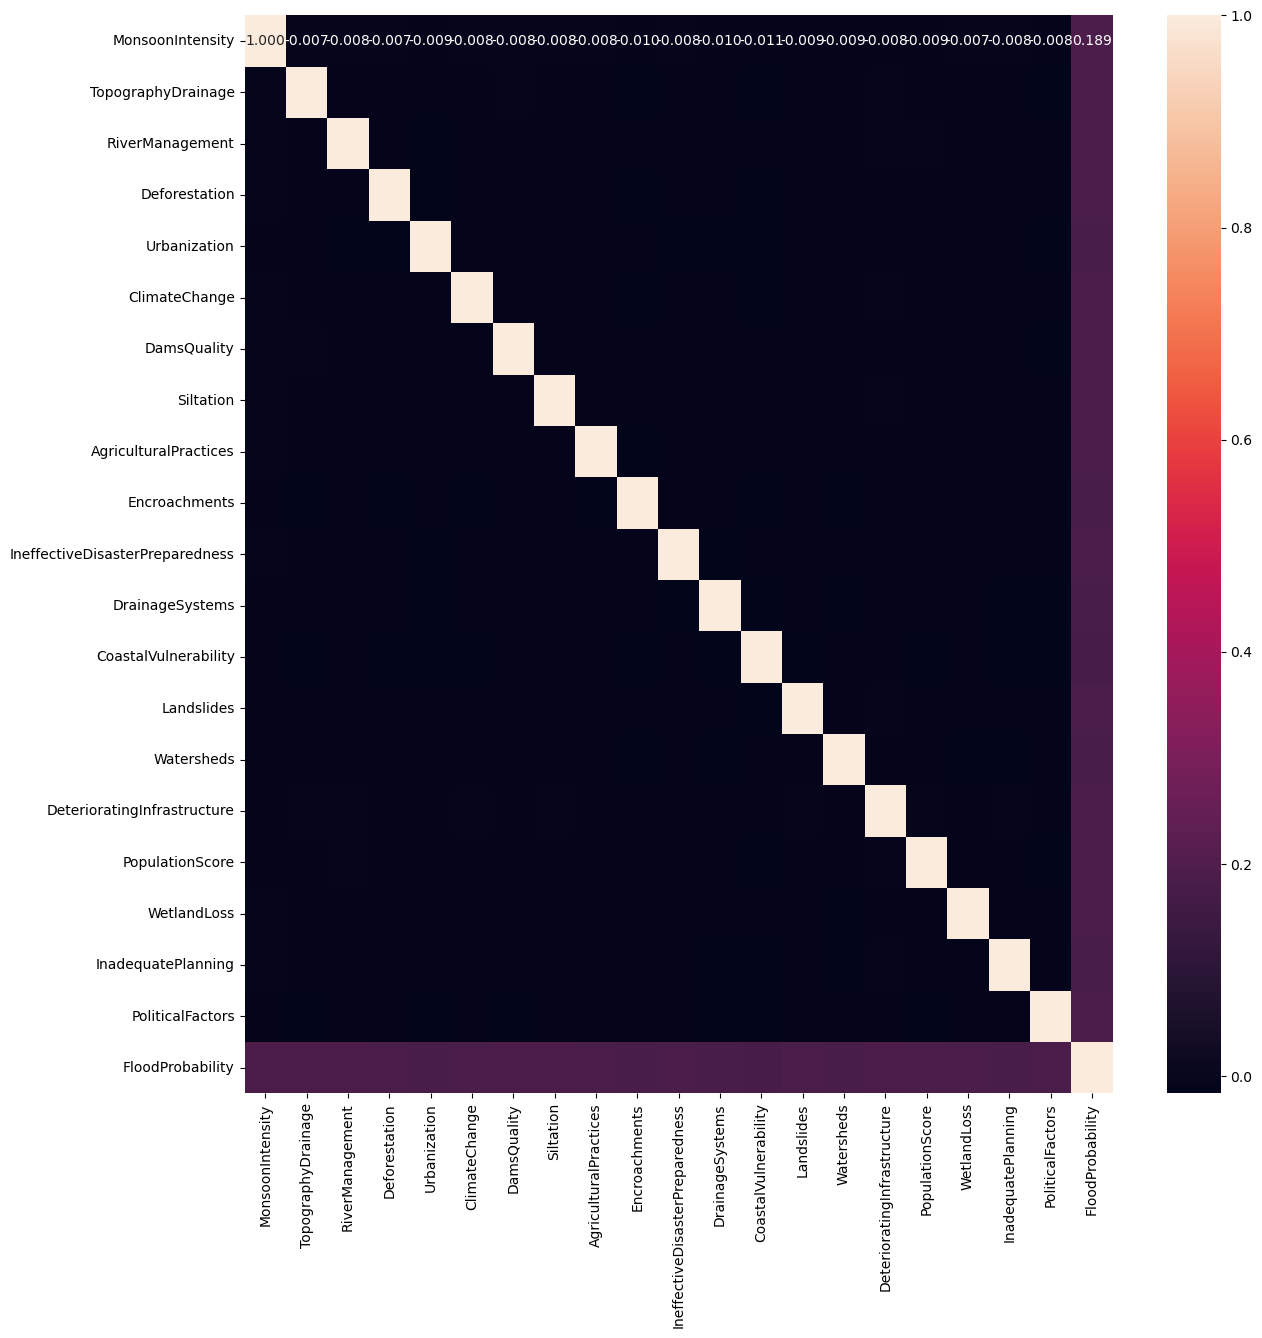

In [25]:
corr = train_copy.corr()

plt.figure(figsize=(20, 15))
sns.heatmap(corr, annot=True, fmt='.3f')
plt.show()

In [21]:
corr

,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,Encroachments,...,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors,FloodProbability
MonsoonIntensity,1.000000,-0.007362,-0.008070,-0.007251,-0.009309,-0.008031,-0.007787,-0.007836,-0.008232,-0.010309,...,-0.009716,-0.010659,-0.009121,-0.008900,-0.008486,-0.008679,-0.006811,-0.008155,-0.008474,0.189098
TopographyDrainage,-0.007362,1.000000,-0.009924,-0.008548,-0.010532,-0.009619,-0.007607,-0.009824,-0.009496,-0.012887,...,-0.010056,-0.012526,-0.010240,-0.011067,-0.006628,-0.010815,-0.010267,-0.011617,-0.012350,0.187635
RiverManagement,-0.008070,-0.009924,1.000000,-0.008574,-0.012292,-0.009237,-0.008711,-0.010058,-0.010783,-0.011615,...,-0.011277,-0.011680,-0.008994,-0.011412,-0.005827,-0.006727,-0.010069,-0.009673,-0.011550,0.187131
Deforestation,-0.007251,-0.008548,-0.008574,1.000000,-0.012248,-0.008266,-0.009356,-0.011536,-0.010039,-0.013175,...,-0.010490,-0.012388,-0.009257,-0.010671,-0.008862,-0.011777,-0.011004,-0.010424,-0.009661,0.184001
Urbanization,-0.009309,-0.010532,-0.012292,-0.012248,1.000000,-0.011199,-0.011128,-0.010153,-0.010559,-0.010784,...,-0.012572,-0.014497,-0.010582,-0.012107,-0.010656,-0.011485,-0.011023,-0.011584,-0.013005,0.180861
ClimateChange,-0.008031,-0.009619,-0.009237,-0.008266,-0.011199,1.000000,-0.008427,-0.009457,-0.011517,-0.012533,...,-0.009650,-0.013005,-0.009352,-0.009882,-0.006324,-0.010332,-0.009376,-0.010772,-0.011379,0.184761
DamsQuality,-0.007787,-0.007607,-0.008711,-0.009356,-0.011128,-0.008427,1.000000,-0.009401,-0.009033,-0.010890,...,-0.010439,-0.012096,-0.009924,-0.009085,-0.009831,-0.009599,-0.009372,-0.011374,-0.013081,0.187996
Siltation,-0.007836,-0.009824,-0.010058,-0.011536,-0.010153,-0.009457,-0.009401,1.000000,-0.010179,-0.010628,...,-0.010702,-0.011762,-0.009173,-0.009457,-0.006312,-0.008739,-0.008667,-0.009079,-0.008493,0.186789
AgriculturalPractices,-0.008232,-0.009496,-0.010783,-0.010039,-0.010559,-0.011517,-0.009033,-0.010179,1.000000,-0.012244,...,-0.010845,-0.011415,-0.010624,-0.009901,-0.008708,-0.008958,-0.011392,-0.010418,-0.011157,0.183366
Encroachments,-0.010309,-0.012887,-0.011615,-0.013175,-0.010784,-0.012533,-0.010890,-0.010628,-0.012244,1.000000,...,-0.011994,-0.016203,-0.011299,-0.013542,-0.010404,-0.010645,-0.010364,-0.012175,-0.011860,0.178841


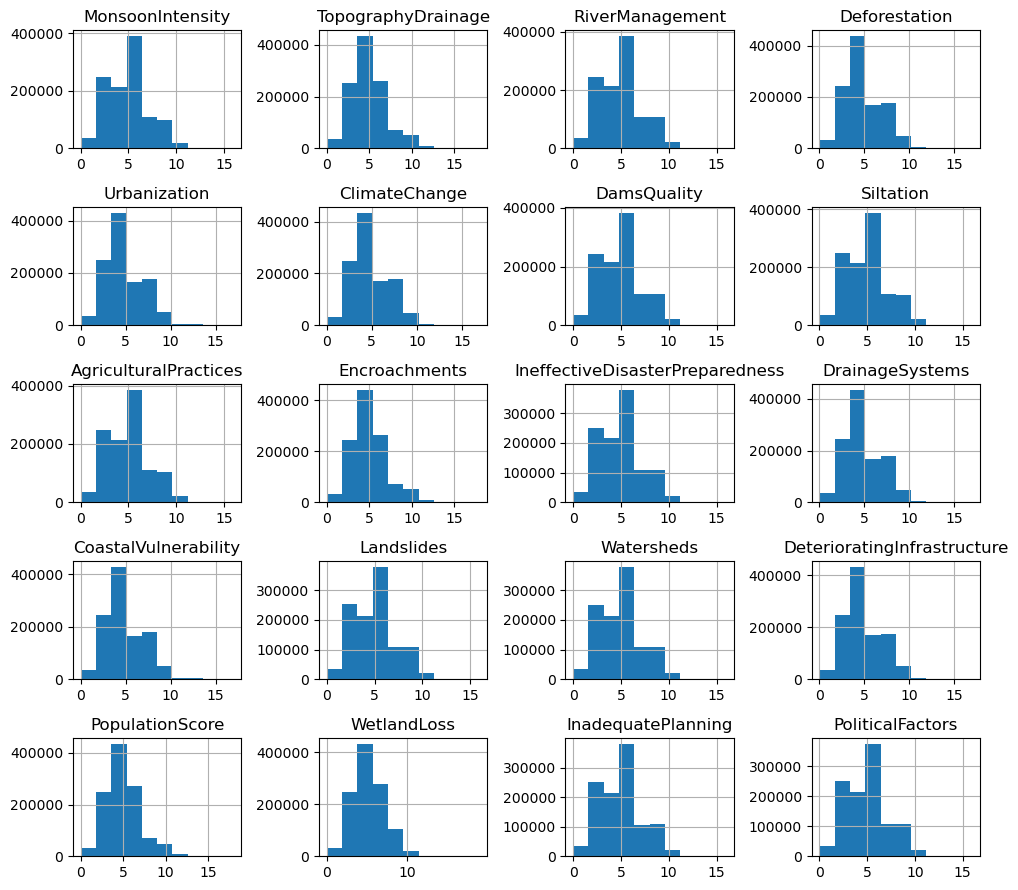

In [27]:
X_features.hist(figsize=(10, 9))
plt.tight_layout()
plt.show()

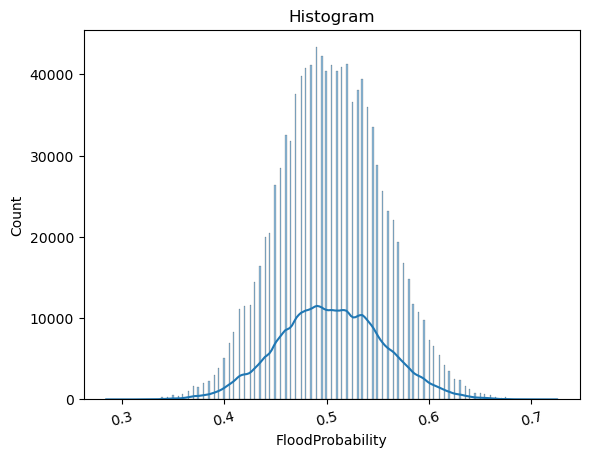

In [28]:
plt.title('Histogram')
plt.xticks(rotation=15)
sns.histplot(y_target, kde=True)
plt.show()

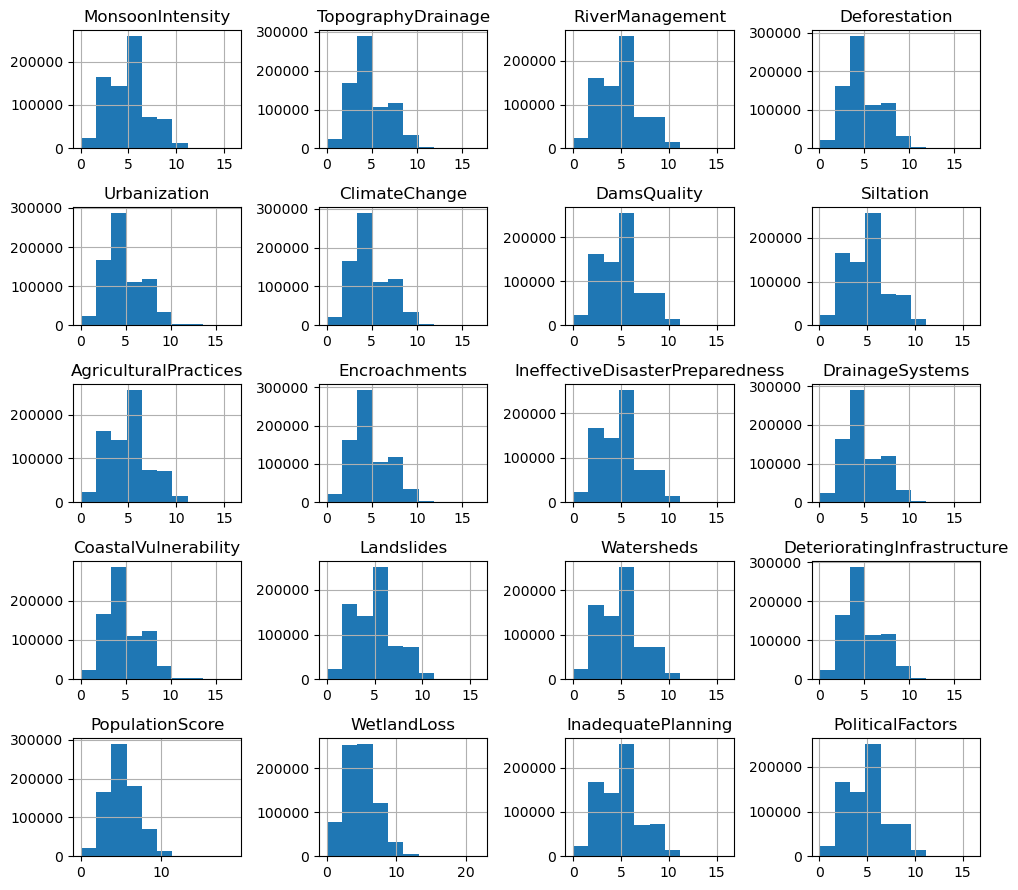

In [29]:
test_copy.hist(figsize=(10, 9))
plt.tight_layout()
plt.show()

In [ ]:
# 2개의 행과 4개의 열을 가진 subplots를 이용. axs는 4x2개의 ax를 가짐.
fig, axs = plt.subplots(figsize=(16,8) , ncols=4 , nrows=2)
lm_features = ['MonsoonIntensity','TopographyDrainage', 'RiverManagement', 'Deforestation','Urbanization','ClimateChange','DamsQuality','Siltation']
for i , feature in enumerate(lm_features):
    row = int(i/4)
    col = i%4
    # 시본의 regplot을 이용해 산점도와 선형 회귀 직선을 함께 표현
    sns.regplot(x=feature , y='FloodProbability',data=train_copy, ax=axs[row][col])

In [ ]:
fig, axs = plt.subplots(figsize=(16,8) , ncols=4 , nrows=2)
lm_features = ['AgriculturalPractices', 'Encroachments','IneffectiveDisasterPreparedness','DrainageSystems','CoastalVulnerability','Landslides',
               'Watersheds', 'DeterioratingInfrastructure']
for i , feature in enumerate(lm_features):
    row = int(i/4)
    col = i%4
    # 시본의 regplot을 이용해 산점도와 선형 회귀 직선을 함께 표현
    sns.regplot(x=feature , y='FloodProbability',data=train_copy, ax=axs[row][col])

In [ ]:
fig, axs = plt.subplots(figsize=(16,8) , ncols=4)
lm_features = ['PopulationScore', 'WetlandLoss','InadequatePlanning','PoliticalFactors']
for i , feature in enumerate(lm_features):
    col = i%4
    # 시본의 regplot을 이용해 산점도와 선형 회귀 직선을 함께 표현
    sns.regplot(x=feature , y='FloodProbability',data=train_copy, ax=axs[col])

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_features, y_target, test_size=0.2, random_state=42)

In [9]:
from sklearn.metrics import r2_score

def get_r2_score(model):
    pred = model.predict(X_test)
    r2 = r2_score(y_test, pred)
    print('{0} r2 score: {1}'.format(model.__class__.__name__, np.round(r2, 3)))
    return r2

# 여러 모델들을 list 형태로 인자로 받아서 개별 모델들의 R² 점수를 list로 반환.
def get_r2_scores(models):
    r2_scores = [ ]
    for model in models:
        r2 = get_r2_score(model)
        r2_scores.append(r2)
    return r2_scores

In [10]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso


# LinearRegression, Ridge, Lasso 학습, 예측, 평가
lr_reg = LinearRegression()
lr_reg.fit(X_train, y_train)

ridge_reg = Ridge()
ridge_reg.fit(X_train, y_train)

lasso_reg = Lasso()
lasso_reg.fit(X_train, y_train)

models = [lr_reg, ridge_reg, lasso_reg]
get_r2_scores(models)

LinearRegression r2 score: 0.845
Ridge r2 score: 0.845
Lasso r2 score: -0.0


[0.8448773362840329, 0.8448773363925367, -2.0418489121709626e-10]

In [11]:
def get_coef(model):
    # coef_ 속성을 기반으로 Series 객체를 생성. index는 컬럼명. 
    coef = pd.Series(model.coef_, index=X_features.columns)
    
    coeff = coef.sort_values(ascending=False)
    return coeff

In [12]:
get_coef(lr_reg)

PopulationScore                    0.005681
Deforestation                      0.005681
CoastalVulnerability               0.005671
RiverManagement                    0.005662
Urbanization                       0.005659
ClimateChange                      0.005659
DamsQuality                        0.005653
Watersheds                         0.005648
Encroachments                      0.005646
PoliticalFactors                   0.005646
TopographyDrainage                 0.005645
Landslides                         0.005643
Siltation                          0.005640
IneffectiveDisasterPreparedness    0.005640
WetlandLoss                        0.005640
AgriculturalPractices              0.005639
DrainageSystems                    0.005633
DeterioratingInfrastructure        0.005618
MonsoonIntensity                   0.005613
InadequatePlanning                 0.005612
dtype: float64

In [13]:
get_coef(ridge_reg)

PopulationScore                    0.005681
Deforestation                      0.005681
CoastalVulnerability               0.005671
RiverManagement                    0.005662
Urbanization                       0.005659
ClimateChange                      0.005659
DamsQuality                        0.005653
Watersheds                         0.005648
Encroachments                      0.005646
PoliticalFactors                   0.005646
TopographyDrainage                 0.005645
Landslides                         0.005643
Siltation                          0.005640
IneffectiveDisasterPreparedness    0.005640
WetlandLoss                        0.005640
AgriculturalPractices              0.005639
DrainageSystems                    0.005633
DeterioratingInfrastructure        0.005618
MonsoonIntensity                   0.005613
InadequatePlanning                 0.005612
dtype: float64

In [14]:
get_coef(lasso_reg)

MonsoonIntensity                   0.0
TopographyDrainage                 0.0
InadequatePlanning                 0.0
WetlandLoss                        0.0
PopulationScore                    0.0
DeterioratingInfrastructure        0.0
Watersheds                         0.0
Landslides                         0.0
CoastalVulnerability               0.0
DrainageSystems                    0.0
IneffectiveDisasterPreparedness    0.0
Encroachments                      0.0
AgriculturalPractices              0.0
Siltation                          0.0
DamsQuality                        0.0
ClimateChange                      0.0
Urbanization                       0.0
Deforestation                      0.0
RiverManagement                    0.0
PoliticalFactors                   0.0
dtype: float64

In [15]:
def visualize_coefficient(models):
    # 3개 회귀 모델의 시각화를 위해 3개의 컬럼을 가지는 subplot 생성
    fig, axs = plt.subplots(figsize=(24,10),nrows=1, ncols=3)
    fig.tight_layout() 
    # 입력인자로 받은 list객체인 models에서 차례로 model을 추출하여 회귀 계수 시각화. 
    for i_num, model in enumerate(models):
 
        coeff = get_coef(model)
        # 순차적으로 ax subplot에 barchar로 표현. 한 화면에 표현하기 위해 tick label 위치와 font 크기 조정. 
        axs[i_num].set_title(model.__class__.__name__+' Coeffiecents', size=25)
        axs[i_num].tick_params(axis="y",direction="in", pad=-120)
        for label in (axs[i_num].get_xticklabels() + axs[i_num].get_yticklabels()):
            label.set_fontsize(22)
        sns.barplot(x=coeff.values, y=coeff.index , ax=axs[i_num])

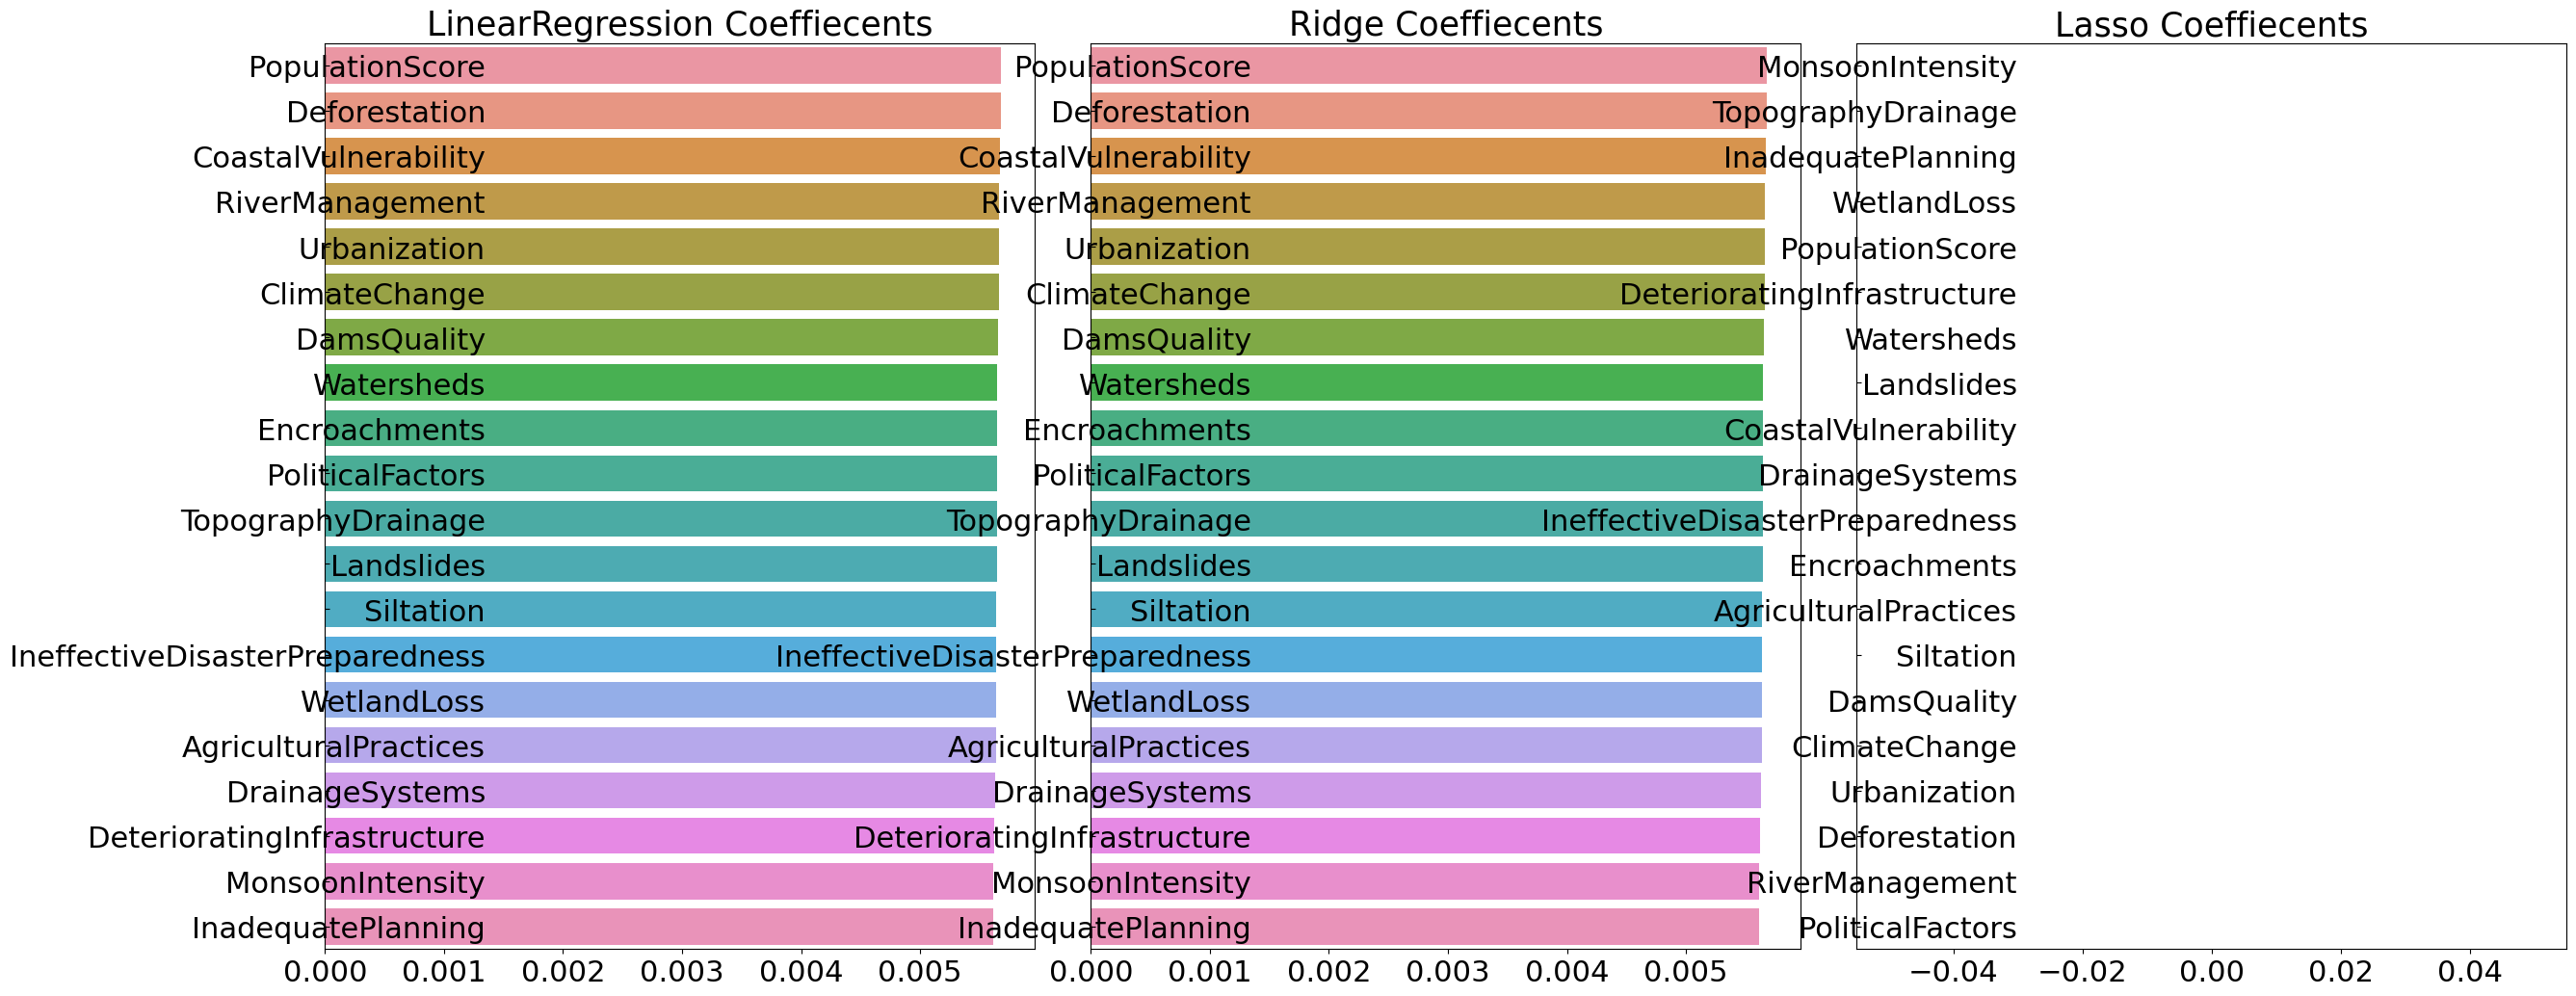

In [16]:
# 앞 예제에서 학습한 lr_reg, ridge_reg, lasso_reg 모델의 회귀 계수 시각화.    
models = [lr_reg, ridge_reg, lasso_reg]
visualize_coefficient(models)

In [19]:
from sklearn.model_selection import cross_val_score

def get_avg_r2_cv(models):
    for model in models:
        # 분할하지 않고 전체 데이터로 cross_val_score( ) 수행. 모델별 CV R2값과 평균 R2 출력
        r2_list = cross_val_score(model, X_features, y_target, scoring="r2", cv=5)
        r2_avg = np.mean(r2_list)
        print('\n{0} CV R2 값 리스트: {1}'.format(model.__class__.__name__, np.round(r2_list, 3)))
        print('{0} CV 평균 R2 값: {1}'.format(model.__class__.__name__, np.round(r2_avg, 3)))

# 앞 예제에서 학습한 ridge_reg, lasso_reg, lr_reg 모델의 CV R2값 출력  
models = [lr_reg, ridge_reg, lasso_reg]
get_avg_r2_cv(models)


LinearRegression CV R2 값 리스트: [0.845 0.843 0.845 0.847 0.845]
LinearRegression CV 평균 R2 값: 0.845

Ridge CV R2 값 리스트: [0.845 0.843 0.845 0.847 0.845]
Ridge CV 평균 R2 값: 0.845

Lasso CV R2 값 리스트: [-0. -0. -0. -0. -0.]
Lasso CV 평균 R2 값: -0.0


In [18]:
from sklearn.model_selection import GridSearchCV

def print_best_params(model, params):
    grid_model = GridSearchCV(model, param_grid=params, 
                              scoring='r2', cv=5)
    grid_model.fit(X_features, y_target)
    r2 = grid_model.best_score_
    print('{0} 5 CV 시 최적 평균 R2 score 값: {1}, 최적 alpha:{2}'.format(model.__class__.__name__,
                                        np.round(r2, 4), grid_model.best_params_))
    return grid_model.best_estimator_

ridge_params = { 'alpha':[0.05, 0.1, 1, 5, 8, 10, 12, 15, 20] }
lasso_params = { 'alpha':[0.001, 0.005, 0.008, 0.05, 0.03, 0.1, 0.5, 1,5, 10] }
best_rige = print_best_params(ridge_reg, ridge_params)
best_lasso = print_best_params(lasso_reg, lasso_params)

Ridge 5 CV 시 최적 평균 R2 score 값: 0.8449, 최적 alpha:{'alpha': 12}
Lasso 5 CV 시 최적 평균 R2 score 값: 0.8427, 최적 alpha:{'alpha': 0.001}


LinearRegression r2 score: 0.845
Ridge r2 score: 0.845
Lasso r2 score: 0.843


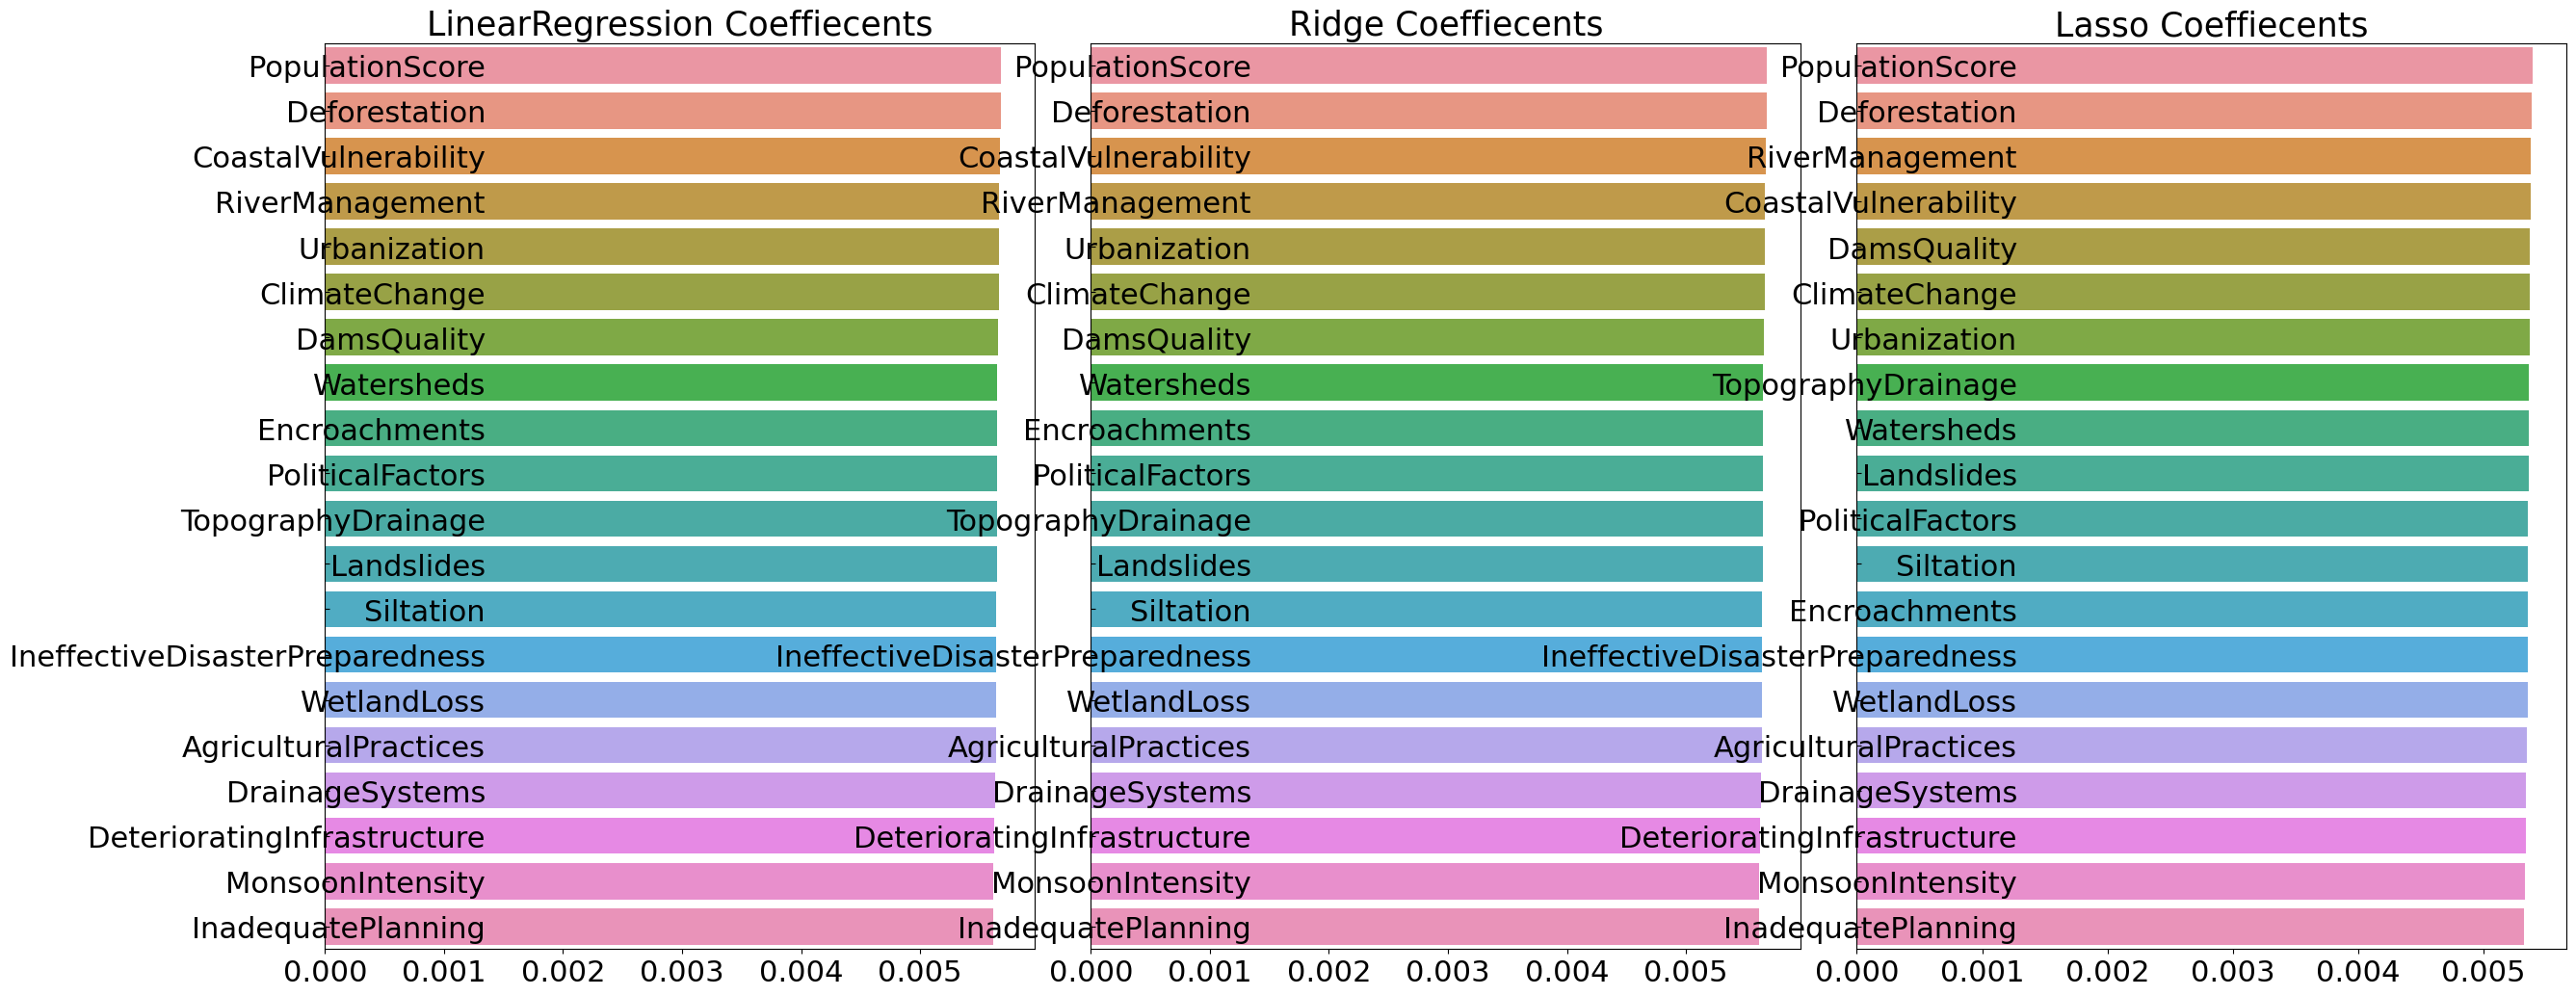

In [20]:
# 앞의 최적화 alpha값으로 학습데이터로 학습, 테스트 데이터로 예측 및 평가 수행. 
lr_reg = LinearRegression()
lr_reg.fit(X_train, y_train)

ridge_reg = Ridge(alpha=12)
ridge_reg.fit(X_train, y_train)

lasso_reg = Lasso(alpha=0.001)
lasso_reg.fit(X_train, y_train)

# 모든 모델의 RMSE 출력
models = [lr_reg, ridge_reg, lasso_reg]
get_r2_scores(models)

# 모든 모델의 회귀 계수 시각화 
models = [lr_reg, ridge_reg, lasso_reg]
visualize_coefficient(models)

In [21]:
from scipy.stats import skew

# house_df에 컬럼 index를 [ ]로 입력하면 해당하는 컬럼 데이터 셋 반환. apply lambda로 skew( )호출 
skew_features = X_features.apply(lambda x : skew(x))
# skew 정도가 1 이상인 컬럼들만 추출. 
skew_features_top = skew_features[skew_features > 1]
print(skew_features_top.sort_values(ascending=False))

Series([], dtype: float64)


In [27]:
skew_features

MonsoonIntensity                   0.444528
TopographyDrainage                 0.458728
RiverManagement                    0.426491
Deforestation                      0.434314
Urbanization                       0.442167
ClimateChange                      0.429403
DamsQuality                        0.441402
Siltation                          0.449247
AgriculturalPractices              0.421144
Encroachments                      0.463550
IneffectiveDisasterPreparedness    0.443368
DrainageSystems                    0.441419
CoastalVulnerability               0.439916
Landslides                         0.425098
Watersheds                         0.450487
DeterioratingInfrastructure        0.444167
PopulationScore                    0.451414
WetlandLoss                        0.437045
InadequatePlanning                 0.455136
PoliticalFactors                   0.437560
dtype: float64

In [29]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

In [33]:
dt_reg = DecisionTreeRegressor(random_state=0, max_depth=4)
rf_reg = RandomForestRegressor(random_state=0, n_estimators=1000, n_jobs=-1)  # 병렬 처리
gb_reg = GradientBoostingRegressor(random_state=0, n_estimators=1000)  # 병렬 처리 없음, 하지만 다른 모델들에 대해 가능

models2 = [dt_reg, rf_reg, gb_reg]
get_avg_r2_cv(models2)


DecisionTreeRegressor CV R2 값 리스트: [0.097 0.097 0.098 0.099 0.097]
DecisionTreeRegressor CV 평균 R2 값: 0.098

RandomForestRegressor CV R2 값 리스트: [0.656 0.654 0.656 0.656 0.656]
RandomForestRegressor CV 평균 R2 값: 0.656

GradientBoostingRegressor CV R2 값 리스트: [0.614 0.614 0.614 0.614 0.615]
GradientBoostingRegressor CV 평균 R2 값: 0.614

XGBRegressor CV R2 값 리스트: [0.809 0.809 0.809 0.812 0.812]
XGBRegressor CV 평균 R2 값: 0.81
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.084381 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 350
[LightGBM] [Info] Number of data points in the train set: 894365, number of used features: 20
[LightGBM] [Info] Start training from score 0.504471
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.109729 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 347
[LightGBM] [Info] Number of data points in

In [41]:
dt_reg = DecisionTreeRegressor(random_state=0, max_depth=4)
rf_reg = RandomForestRegressor(random_state=0, n_estimators=1000, n_jobs=-1)  # 병렬 처리
gb_reg = GradientBoostingRegressor(random_state=0, n_estimators=1000)  # 병렬 처리 없음, 하지만 다른 모델들에 대해 가능

models2 = [dt_reg, rf_reg, gb_reg]
get_avg_r2_cv(models2)


DecisionTreeRegressor CV R2 값 리스트: [0.097 0.097 0.098 0.099 0.097]
DecisionTreeRegressor CV 평균 R2 값: 0.098


ValueError: 
All the 5 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1 fits failed with the following error:
joblib.externals.loky.process_executor._RemoteTraceback: 
"""
Traceback (most recent call last):
  File "C:\Users\82106\anaconda3\Lib\site-packages\joblib\externals\loky\process_executor.py", line 343, in _sendback_result
    result_queue.put(_ResultItem(work_id, result=result,
  File "C:\Users\82106\anaconda3\Lib\site-packages\joblib\externals\loky\backend\queues.py", line 186, in put
    obj = dumps(obj, reducers=self._reducers)
          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\82106\anaconda3\Lib\site-packages\joblib\externals\loky\backend\reduction.py", line 211, in dumps
    dump(obj, buf, reducers=reducers, protocol=protocol)
  File "C:\Users\82106\anaconda3\Lib\site-packages\joblib\externals\loky\backend\reduction.py", line 204, in dump
    _LokyPickler(file, reducers=reducers, protocol=protocol).dump(obj)
  File "C:\Users\82106\anaconda3\Lib\site-packages\joblib\externals\cloudpickle\cloudpickle_fast.py", line 632, in dump
    return Pickler.dump(self, obj)
           ^^^^^^^^^^^^^^^^^^^^^^^
MemoryError
"""

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "C:\Users\82106\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\82106\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py", line 473, in fit
    trees = Parallel(
            ^^^^^^^^^
  File "C:\Users\82106\anaconda3\Lib\site-packages\sklearn\utils\parallel.py", line 63, in __call__
    return super().__call__(iterable_with_config)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\82106\anaconda3\Lib\site-packages\joblib\parallel.py", line 1098, in __call__
    self.retrieve()
  File "C:\Users\82106\anaconda3\Lib\site-packages\joblib\parallel.py", line 975, in retrieve
    self._output.extend(job.get(timeout=self.timeout))
                        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\82106\anaconda3\Lib\site-packages\joblib\_parallel_backends.py", line 567, in wrap_future_result
    return future.result(timeout=timeout)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\82106\anaconda3\Lib\concurrent\futures\_base.py", line 456, in result
    return self.__get_result()
           ^^^^^^^^^^^^^^^^^^^
  File "C:\Users\82106\anaconda3\Lib\concurrent\futures\_base.py", line 401, in __get_result
    raise self._exception
MemoryError

--------------------------------------------------------------------------------
1 fits failed with the following error:
joblib.externals.loky.process_executor._RemoteTraceback: 
"""
Traceback (most recent call last):
  File "C:\Users\82106\anaconda3\Lib\site-packages\joblib\externals\loky\process_executor.py", line 428, in _process_worker
    r = call_item()
        ^^^^^^^^^^^
  File "C:\Users\82106\anaconda3\Lib\site-packages\joblib\externals\loky\process_executor.py", line 275, in __call__
    return self.fn(*self.args, **self.kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\82106\anaconda3\Lib\site-packages\joblib\_parallel_backends.py", line 620, in __call__
    return self.func(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\82106\anaconda3\Lib\site-packages\joblib\parallel.py", line 288, in __call__
    return [func(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\82106\anaconda3\Lib\site-packages\joblib\parallel.py", line 288, in <listcomp>
    return [func(*args, **kwargs)
            ^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\82106\anaconda3\Lib\site-packages\sklearn\utils\parallel.py", line 123, in __call__
    return self.function(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\82106\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py", line 184, in _parallel_build_trees
    tree.fit(X, y, sample_weight=curr_sample_weight, check_input=False)
  File "C:\Users\82106\anaconda3\Lib\site-packages\sklearn\tree\_classes.py", line 1247, in fit
    super().fit(
  File "C:\Users\82106\anaconda3\Lib\site-packages\sklearn\tree\_classes.py", line 379, in fit
    builder.build(self.tree_, X, y, sample_weight)
  File "sklearn\tree\_tree.pyx", line 147, in sklearn.tree._tree.DepthFirstTreeBuilder.build
  File "sklearn\tree\_tree.pyx", line 242, in sklearn.tree._tree.DepthFirstTreeBuilder.build
  File "sklearn\tree\_tree.pyx", line 748, in sklearn.tree._tree.Tree._add_node
  File "sklearn\tree\_tree.pyx", line 719, in sklearn.tree._tree.Tree._resize_c
  File "sklearn\tree\_utils.pyx", line 35, in sklearn.tree._utils.safe_realloc
MemoryError: could not allocate 58720256 bytes
"""

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "C:\Users\82106\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\82106\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py", line 473, in fit
    trees = Parallel(
            ^^^^^^^^^
  File "C:\Users\82106\anaconda3\Lib\site-packages\sklearn\utils\parallel.py", line 63, in __call__
    return super().__call__(iterable_with_config)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\82106\anaconda3\Lib\site-packages\joblib\parallel.py", line 1098, in __call__
    self.retrieve()
  File "C:\Users\82106\anaconda3\Lib\site-packages\joblib\parallel.py", line 975, in retrieve
    self._output.extend(job.get(timeout=self.timeout))
                        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\82106\anaconda3\Lib\site-packages\joblib\_parallel_backends.py", line 567, in wrap_future_result
    return future.result(timeout=timeout)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\82106\anaconda3\Lib\concurrent\futures\_base.py", line 456, in result
    return self.__get_result()
           ^^^^^^^^^^^^^^^^^^^
  File "C:\Users\82106\anaconda3\Lib\concurrent\futures\_base.py", line 401, in __get_result
    raise self._exception
MemoryError: could not allocate 58720256 bytes

--------------------------------------------------------------------------------
1 fits failed with the following error:
joblib.externals.loky.process_executor._RemoteTraceback: 
"""
Traceback (most recent call last):
  File "C:\Users\82106\anaconda3\Lib\site-packages\joblib\externals\loky\process_executor.py", line 428, in _process_worker
    r = call_item()
        ^^^^^^^^^^^
  File "C:\Users\82106\anaconda3\Lib\site-packages\joblib\externals\loky\process_executor.py", line 275, in __call__
    return self.fn(*self.args, **self.kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\82106\anaconda3\Lib\site-packages\joblib\_parallel_backends.py", line 620, in __call__
    return self.func(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\82106\anaconda3\Lib\site-packages\joblib\parallel.py", line 288, in __call__
    return [func(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\82106\anaconda3\Lib\site-packages\joblib\parallel.py", line 288, in <listcomp>
    return [func(*args, **kwargs)
            ^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\82106\anaconda3\Lib\site-packages\sklearn\utils\parallel.py", line 123, in __call__
    return self.function(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\82106\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py", line 184, in _parallel_build_trees
    tree.fit(X, y, sample_weight=curr_sample_weight, check_input=False)
  File "C:\Users\82106\anaconda3\Lib\site-packages\sklearn\tree\_classes.py", line 1247, in fit
    super().fit(
  File "C:\Users\82106\anaconda3\Lib\site-packages\sklearn\tree\_classes.py", line 379, in fit
    builder.build(self.tree_, X, y, sample_weight)
  File "sklearn\tree\_tree.pyx", line 147, in sklearn.tree._tree.DepthFirstTreeBuilder.build
  File "sklearn\tree\_tree.pyx", line 173, in sklearn.tree._tree.DepthFirstTreeBuilder.build
  File "sklearn\tree\_splitter.pyx", line 233, in sklearn.tree._splitter.BaseDenseSplitter.init
  File "sklearn\tree\_splitter.pyx", line 154, in sklearn.tree._splitter.Splitter.init
numpy.core._exceptions._ArrayMemoryError: Unable to allocate 3.41 MiB for an array with shape (894366,) and data type float32
"""

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "C:\Users\82106\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\82106\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py", line 473, in fit
    trees = Parallel(
            ^^^^^^^^^
  File "C:\Users\82106\anaconda3\Lib\site-packages\sklearn\utils\parallel.py", line 63, in __call__
    return super().__call__(iterable_with_config)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\82106\anaconda3\Lib\site-packages\joblib\parallel.py", line 1098, in __call__
    self.retrieve()
  File "C:\Users\82106\anaconda3\Lib\site-packages\joblib\parallel.py", line 975, in retrieve
    self._output.extend(job.get(timeout=self.timeout))
                        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\82106\anaconda3\Lib\site-packages\joblib\_parallel_backends.py", line 567, in wrap_future_result
    return future.result(timeout=timeout)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\82106\anaconda3\Lib\concurrent\futures\_base.py", line 456, in result
    return self.__get_result()
           ^^^^^^^^^^^^^^^^^^^
  File "C:\Users\82106\anaconda3\Lib\concurrent\futures\_base.py", line 401, in __get_result
    raise self._exception
numpy.core._exceptions._ArrayMemoryError: Unable to allocate 3.41 MiB for an array with shape (894366,) and data type float32

--------------------------------------------------------------------------------
1 fits failed with the following error:
joblib.externals.loky.process_executor._RemoteTraceback: 
"""
Traceback (most recent call last):
  File "C:\Users\82106\anaconda3\Lib\site-packages\joblib\externals\loky\process_executor.py", line 343, in _sendback_result
    result_queue.put(_ResultItem(work_id, result=result,
  File "C:\Users\82106\anaconda3\Lib\site-packages\joblib\externals\loky\backend\queues.py", line 186, in put
    obj = dumps(obj, reducers=self._reducers)
          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\82106\anaconda3\Lib\site-packages\joblib\externals\loky\backend\reduction.py", line 211, in dumps
    dump(obj, buf, reducers=reducers, protocol=protocol)
  File "C:\Users\82106\anaconda3\Lib\site-packages\joblib\externals\loky\backend\reduction.py", line 204, in dump
    _LokyPickler(file, reducers=reducers, protocol=protocol).dump(obj)
  File "C:\Users\82106\anaconda3\Lib\site-packages\joblib\externals\cloudpickle\cloudpickle_fast.py", line 632, in dump
    return Pickler.dump(self, obj)
           ^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\82106\anaconda3\Lib\site-packages\joblib\_memmapping_reducer.py", line 313, in reduce_array_memmap_backward
    loads, (dumps(np.asarray(a), protocol=HIGHEST_PROTOCOL), )
            ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
MemoryError
"""

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "C:\Users\82106\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\82106\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py", line 473, in fit
    trees = Parallel(
            ^^^^^^^^^
  File "C:\Users\82106\anaconda3\Lib\site-packages\sklearn\utils\parallel.py", line 63, in __call__
    return super().__call__(iterable_with_config)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\82106\anaconda3\Lib\site-packages\joblib\parallel.py", line 1098, in __call__
    self.retrieve()
  File "C:\Users\82106\anaconda3\Lib\site-packages\joblib\parallel.py", line 975, in retrieve
    self._output.extend(job.get(timeout=self.timeout))
                        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\82106\anaconda3\Lib\site-packages\joblib\_parallel_backends.py", line 567, in wrap_future_result
    return future.result(timeout=timeout)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\82106\anaconda3\Lib\concurrent\futures\_base.py", line 456, in result
    return self.__get_result()
           ^^^^^^^^^^^^^^^^^^^
  File "C:\Users\82106\anaconda3\Lib\concurrent\futures\_base.py", line 401, in __get_result
    raise self._exception
MemoryError

--------------------------------------------------------------------------------
1 fits failed with the following error:
joblib.externals.loky.process_executor._RemoteTraceback: 
"""
Traceback (most recent call last):
  File "C:\Users\82106\anaconda3\Lib\site-packages\joblib\externals\loky\process_executor.py", line 428, in _process_worker
    r = call_item()
        ^^^^^^^^^^^
  File "C:\Users\82106\anaconda3\Lib\site-packages\joblib\externals\loky\process_executor.py", line 275, in __call__
    return self.fn(*self.args, **self.kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\82106\anaconda3\Lib\site-packages\joblib\_parallel_backends.py", line 620, in __call__
    return self.func(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\82106\anaconda3\Lib\site-packages\joblib\parallel.py", line 288, in __call__
    return [func(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\82106\anaconda3\Lib\site-packages\joblib\parallel.py", line 288, in <listcomp>
    return [func(*args, **kwargs)
            ^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\82106\anaconda3\Lib\site-packages\sklearn\utils\parallel.py", line 123, in __call__
    return self.function(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\82106\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py", line 184, in _parallel_build_trees
    tree.fit(X, y, sample_weight=curr_sample_weight, check_input=False)
  File "C:\Users\82106\anaconda3\Lib\site-packages\sklearn\tree\_classes.py", line 1247, in fit
    super().fit(
  File "C:\Users\82106\anaconda3\Lib\site-packages\sklearn\tree\_classes.py", line 379, in fit
    builder.build(self.tree_, X, y, sample_weight)
  File "sklearn\tree\_tree.pyx", line 147, in sklearn.tree._tree.DepthFirstTreeBuilder.build
  File "sklearn\tree\_tree.pyx", line 242, in sklearn.tree._tree.DepthFirstTreeBuilder.build
  File "sklearn\tree\_tree.pyx", line 748, in sklearn.tree._tree.Tree._add_node
  File "sklearn\tree\_tree.pyx", line 719, in sklearn.tree._tree.Tree._resize_c
  File "sklearn\tree\_utils.pyx", line 35, in sklearn.tree._utils.safe_realloc
MemoryError: could not allocate 29360128 bytes
"""

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "C:\Users\82106\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\82106\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py", line 473, in fit
    trees = Parallel(
            ^^^^^^^^^
  File "C:\Users\82106\anaconda3\Lib\site-packages\sklearn\utils\parallel.py", line 63, in __call__
    return super().__call__(iterable_with_config)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\82106\anaconda3\Lib\site-packages\joblib\parallel.py", line 1098, in __call__
    self.retrieve()
  File "C:\Users\82106\anaconda3\Lib\site-packages\joblib\parallel.py", line 975, in retrieve
    self._output.extend(job.get(timeout=self.timeout))
                        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\82106\anaconda3\Lib\site-packages\joblib\_parallel_backends.py", line 567, in wrap_future_result
    return future.result(timeout=timeout)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\82106\anaconda3\Lib\concurrent\futures\_base.py", line 456, in result
    return self.__get_result()
           ^^^^^^^^^^^^^^^^^^^
  File "C:\Users\82106\anaconda3\Lib\concurrent\futures\_base.py", line 401, in __get_result
    raise self._exception
MemoryError: could not allocate 29360128 bytes


In [ ]:
xgb_reg = XGBRegressor(n_estimators=1000, learning_rate=0.05, 
                       colsample_bytree=0.5, subsample=0.8)

lgbm_reg = LGBMRegressor(n_estimators=1000, learning_rate=0.05, num_leaves=4, 
                         subsample=0.6, colsample_bytree=0.4, reg_lambda=10, n_jobs=-1)

models3 = [xgb_reg, lgbm_reg]
get_avg_r2_cv(models2)

In [35]:
def get_r2_pred(preds):
    for key in preds.keys():
        pred_value = preds[key]
        r2 = r2_score(y_test, pred_value)
        print('{0} 모델의 R2: {1}'.format(key, r2))

# 개별 모델의 학습
ridge_reg = Ridge(alpha=12)
ridge_reg.fit(X_train, y_train)
lasso_reg = Lasso(alpha=0.001)
lasso_reg.fit(X_train, y_train)
# 개별 모델 예측
ridge_pred = ridge_reg.predict(X_test)
lasso_pred = lasso_reg.predict(X_test)

# 개별 모델 예측값 혼합으로 최종 예측값 도출
pred = 0.6 * ridge_pred + 0.4 * lasso_pred
preds = {'최종 혼합': pred,
         'Ridge': ridge_pred,
         'Lasso': lasso_pred}
#최종 혼합 모델, 개별모델의 RMSE 값 출력
get_r2_pred(preds)

최종 혼합 모델의 R2: 0.8445280078772891
Ridge 모델의 R2: 0.8448773375743635
Lasso 모델의 R2: 0.8426685848296875


In [38]:
from sklearn.model_selection import KFold
from sklearn.metrics import mean_absolute_error

# 개별 기반 모델에서 최종 메타 모델이 사용할 학습 및 테스트용 데이터를 생성하기 위한 함수. 
def get_stacking_base_datasets(model, X_train_n, y_train_n, X_test_n, n_folds ):
    # 지정된 n_folds값으로 KFold 생성.
    kf = KFold(n_splits=n_folds, shuffle=False)
    #추후에 메타 모델이 사용할 학습 데이터 반환을 위한 넘파이 배열 초기화 
    train_fold_pred = np.zeros((X_train_n.shape[0] ,1 ))
    test_pred = np.zeros((X_test_n.shape[0],n_folds))
    print(model.__class__.__name__ , ' model 시작 ')
    
    for folder_counter , (train_index, valid_index) in enumerate(kf.split(X_train_n)):
        #입력된 학습 데이터에서 기반 모델이 학습/예측할 폴드 데이터 셋 추출 
        print('\t 폴드 세트: ',folder_counter,' 시작 ')
        X_tr = X_train_n[train_index] 
        y_tr = y_train_n[train_index] 
        X_te = X_train_n[valid_index]  
        
        #폴드 세트 내부에서 다시 만들어진 학습 데이터로 기반 모델의 학습 수행.
        model.fit(X_tr , y_tr)       
        #폴드 세트 내부에서 다시 만들어진 검증 데이터로 기반 모델 예측 후 데이터 저장.
        train_fold_pred[valid_index, :] = model.predict(X_te).reshape(-1,1)
        #입력된 원본 테스트 데이터를 폴드 세트내 학습된 기반 모델에서 예측 후 데이터 저장. 
        test_pred[:, folder_counter] = model.predict(X_test_n)
            
    # 폴드 세트 내에서 원본 테스트 데이터를 예측한 데이터를 평균하여 테스트 데이터로 생성 
    test_pred_mean = np.mean(test_pred, axis=1).reshape(-1,1)    
    
    #train_fold_pred는 최종 메타 모델이 사용하는 학습 데이터, test_pred_mean은 테스트 데이터
    return train_fold_pred , test_pred_mean

In [39]:
# get_stacking_base_datasets( )은 넘파이 ndarray를 인자로 사용하므로 DataFrame을 넘파이로 변환. 
X_train_n = X_train.values
X_test_n = X_test.values
y_train_n = y_train.values

# 각 개별 기반(Base)모델이 생성한 학습용/테스트용 데이터 반환. 
ridge_train, ridge_test = get_stacking_base_datasets(ridge_reg, X_train_n, y_train_n, X_test_n, 5)
lasso_train, lasso_test = get_stacking_base_datasets(lasso_reg, X_train_n, y_train_n, X_test_n, 5)
xgb_train, xgb_test = get_stacking_base_datasets(xgb_reg, X_train_n, y_train_n, X_test_n, 5)  
lgbm_train, lgbm_test = get_stacking_base_datasets(lgbm_reg, X_train_n, y_train_n, X_test_n, 5)

Ridge  model 시작 
	 폴드 세트:  0  시작 
	 폴드 세트:  1  시작 
	 폴드 세트:  2  시작 
	 폴드 세트:  3  시작 
	 폴드 세트:  4  시작 
Lasso  model 시작 
	 폴드 세트:  0  시작 
	 폴드 세트:  1  시작 
	 폴드 세트:  2  시작 
	 폴드 세트:  3  시작 
	 폴드 세트:  4  시작 
XGBRegressor  model 시작 
	 폴드 세트:  0  시작 
	 폴드 세트:  1  시작 
	 폴드 세트:  2  시작 
	 폴드 세트:  3  시작 
	 폴드 세트:  4  시작 
LGBMRegressor  model 시작 
	 폴드 세트:  0  시작 
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.056590 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 346
[LightGBM] [Info] Number of data points in the train set: 715492, number of used features: 20
[LightGBM] [Info] Start training from score 0.504504
	 폴드 세트:  1  시작 
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.065397 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 346
[LightGBM] [Info] Number of data points in the train set: 715492, number of used features: 

In [40]:
# 개별 모델이 반환한 학습 및 테스트용 데이터 세트를 Stacking 형태로 결합.  
Stack_final_X_train = np.concatenate((ridge_train, lasso_train, 
                                      xgb_train, lgbm_train), axis=1)
Stack_final_X_test = np.concatenate((ridge_test, lasso_test, 
                                     xgb_test, lgbm_test), axis=1)

# 최종 메타 모델은 라쏘 모델을 적용. 
meta_model_lasso = Lasso(alpha=0.0005)

#기반 모델의 예측값을 기반으로 새롭게 만들어진 학습 및 테스트용 데이터로 예측하고 RMSE 측정.
meta_model_lasso.fit(Stack_final_X_train, y_train)
final = meta_model_lasso.predict(Stack_final_X_test)
r2 = r2_score(y_test, final)
print('스태킹 회귀 모델의 최종 R2 값은:', r2)

스태킹 회귀 모델의 최종 R2 값은: 0.8013314996074219


In [ ]:
y_pred = model.predict(test_copy)

In [ ]:
submission = pd.DataFrame({'id': submission['id'], 'FloodProbability': y_pred})